In [26]:
import re, scipy
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
word_list = set()
sentences = []
with open('./sentences.txt', 'r') as fin:
    for line in fin:
        tokens = filter(lambda x: len(x)>0, re.split('[^a-z]',line.lower()))
        word_list = word_list | set(tokens)
        sentences.append(dict(Counter(tokens)))

In [3]:
word2idx = {word:idx for idx, word in enumerate(word_list)}
idx2word = {idx:word for word, idx in word2idx.items()}

In [4]:
matrix = np.zeros((len(sentences),len(word_list)))
matrix.shape

(22, 254)

In [5]:
for idx, sentence in enumerate(sentences):
    for k, v in sentence.items():
        matrix[idx,word2idx[k]] = v

In [6]:
matrix.sum(0)

array([ 1.,  1.,  1.,  3.,  1.,  2.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,
        1.,  1.,  2.,  1.,  1.,  1.,  1.,  1., 14.,  1.,  1.,  1.,  4.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        3.,  2.,  1.,  1.,  1.,  2.,  3.,  1.,  2.,  1.,  2.,  1.,  1.,
        1.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  3.,
        1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  9.,  1.,  1.,  3.,  1.,
        2.,  1.,  1.,  1.,  3.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,
        8.,  3.,  1., 14.,  1.,  1.,  1.,  8.,  1.,  1.,  4.,  1.,  1.,
        2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,
        1.,  4.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  2.,  3.,  3.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  1., 10.,  2.,  1.,
        3.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2., 19.,  7

In [8]:
from scipy.spatial.distance import cosine

In [10]:
for idx in range(1,matrix.shape[0]):
    print "comparison with ", idx
    print cosine(matrix[0], matrix[idx])
    print ""

comparison with  1
0.9527544408738466

comparison with  2
0.8644738145642124

comparison with  3
0.8951715163278082

comparison with  4
0.7770887149698589

comparison with  5
0.9402385695332803

comparison with  6
0.7327387580875756

comparison with  7
0.9258750683338899

comparison with  8
0.8842724875284311

comparison with  9
0.9055088817476932

comparison with  10
0.8328165362273942

comparison with  11
0.8804771390665607

comparison with  12
0.8396432548525454

comparison with  13
0.8703592552895671

comparison with  14
0.8740118423302576

comparison with  15
0.9442721787424647

comparison with  16
0.8406361854220809

comparison with  17
0.956644501523794

comparison with  18
0.9442721787424647

comparison with  19
0.8885443574849294

comparison with  20
0.8427572744917122

comparison with  21
0.8250364469440588



In [12]:
from scipy.linalg import solve

In [13]:
from math import sin, exp

In [21]:
f = lambda x: sin(x/5.)*exp(x/10.) + 5*exp(-x/2.)

[[ 1.  1.]
 [ 1. 15.]]
[3.252216865271419, 0.6352214195786656]


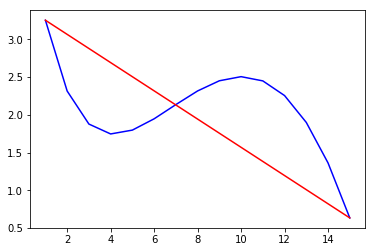

In [52]:
x = np.array([[1., 1.], [1., 15.]])
print x

y = [f(1.), f(15.)]
print y

w = solve(x, y)

idx = [float(i) for i in range(1,16)]
plt.plot(idx, [f(i) for i in idx], 'b')
plt.plot(idx, [w[0]+w[1]*i for i in idx], 'r')

In [ ]:
plo

[[  1.   1.   1.]
 [  1.   8.  64.]
 [  1.  15. 225.]]
[3.25221687 2.31617016 0.63522142]


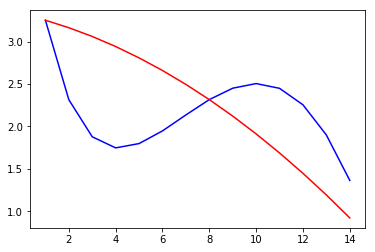

In [53]:
x = np.array([[1., 1., 1.], [1., 8., 8.**2],[1., 15., 15.**2]])
print x

y = np.array([f(1.), f(8.), f(15.)])
print y

w = solve(x, y)

idx = [float(i) for i in range(1,15)]
plt.plot(idx, [f(i) for i in idx], 'b')
plt.plot(idx, [w[0]+w[1]*i+w[2]*i**2 for i in idx], 'r')

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]]
[3.25221687 1.74684595 2.50541641 0.63522142]
4.36264153512 -1.29552586569 0.193336847022 -0.00823565117332


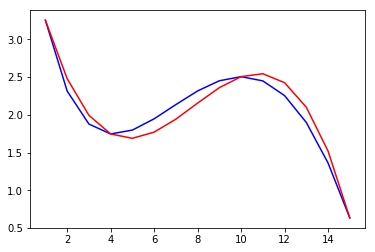

In [54]:
x = np.array([[1., 1., 1., 1.], [1., 4., 4.**2, 4.**3],[1., 10., 10.**2, 10.**3], [1., 15., 15.**2, 15.**3]])
print x

y = np.array([f(1.), f(4.), f(10.), f(15.)])
print y

w = solve(x,y)

print ' '.join(map(str, w.tolist()))

idx = [float(i) for i in range(1,16)]
plt.plot(idx, [f(i) for i in idx], 'b')
plt.plot(idx, [w[0]+w[1]*i+w[2]*i**2+w[3]*i**3 for i in idx], 'r')